In [1]:
!tesseract --version

tesseract v5.3.0.20221222
 leptonica-1.78.0
  libgif 5.1.4 : libjpeg 8d (libjpeg-turbo 1.5.3) : libpng 1.6.34 : libtiff 4.0.9 : zlib 1.2.11 : libwebp 0.6.1 : libopenjp2 2.3.0
 Found AVX2
 Found AVX
 Found FMA
 Found SSE4.1
 Found libarchive 3.5.0 zlib/1.2.11 liblzma/5.2.3 bz2lib/1.0.6 liblz4/1.7.5 libzstd/1.4.5
 Found libcurl/7.77.0-DEV Schannel zlib/1.2.11 zstd/1.4.5 libidn2/2.0.4 nghttp2/1.31.0


In [2]:
!tesseract --list-langs

List of available languages in "C:\Program Files\Tesseract-OCR/tessdata/" (2):
eng
osd


In [3]:
!tesseract --help-psm

Page segmentation modes:
  0    Orientation and script detection (OSD) only.
  1    Automatic page segmentation with OSD.
  2    Automatic page segmentation, but no OSD, or OCR. (not implemented)
  3    Fully automatic page segmentation, but no OSD. (Default)
  4    Assume a single column of text of variable sizes.
  5    Assume a single uniform block of vertically aligned text.
  6    Assume a single uniform block of text.
  7    Treat the image as a single text line.
  8    Treat the image as a single word.
  9    Treat the image as a single word in a circle.
 10    Treat the image as a single character.
 11    Sparse text. Find as much text as possible in no particular order.
 12    Sparse text with OSD.
 13    Raw line. Treat the image as a single text line,
       bypassing hacks that are Tesseract-specific.


In [4]:
!tesseract --help-oem

OCR Engine modes:
  0    Legacy engine only.
  1    Neural nets LSTM engine only.
  2    Legacy + LSTM engines.
  3    Default, based on what is available.


In [5]:
from matplotlib import pyplot as plt
import cv2
import numpy as np
import pytesseract
import download
from extract import unsharp, thresh, gray, scale, blur, extract_text

In [6]:
def show(image):
    plt.figure(figsize = (20,10))
    plt.axis("off")
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), interpolation='nearest')
    plt.show()

def tess(image):
    show(image)
    print(extract_text(image))

https://youtu.be/Oevq2aSOs0M

In [7]:
# Oevq2aSOs0M 720 727
src = download.get_frame('h229pDV2W_c', 833)

In [8]:
src.shape

(720, 960, 3)

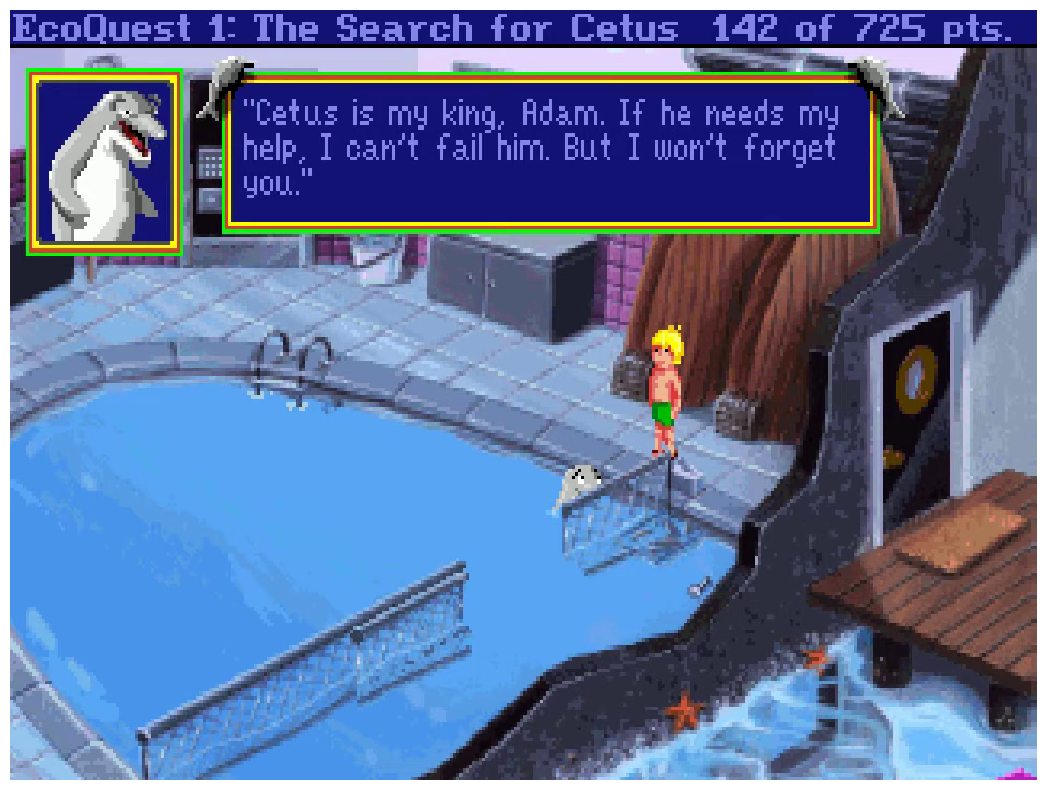

EcoQuest 1: The Search for Cetus 142 of 725 pts.

“Cetus is my king, Adan. Tf he needs my
ga help, I can’t fail hinn. But I won't forget

" iS you,




In [9]:
tess(src)

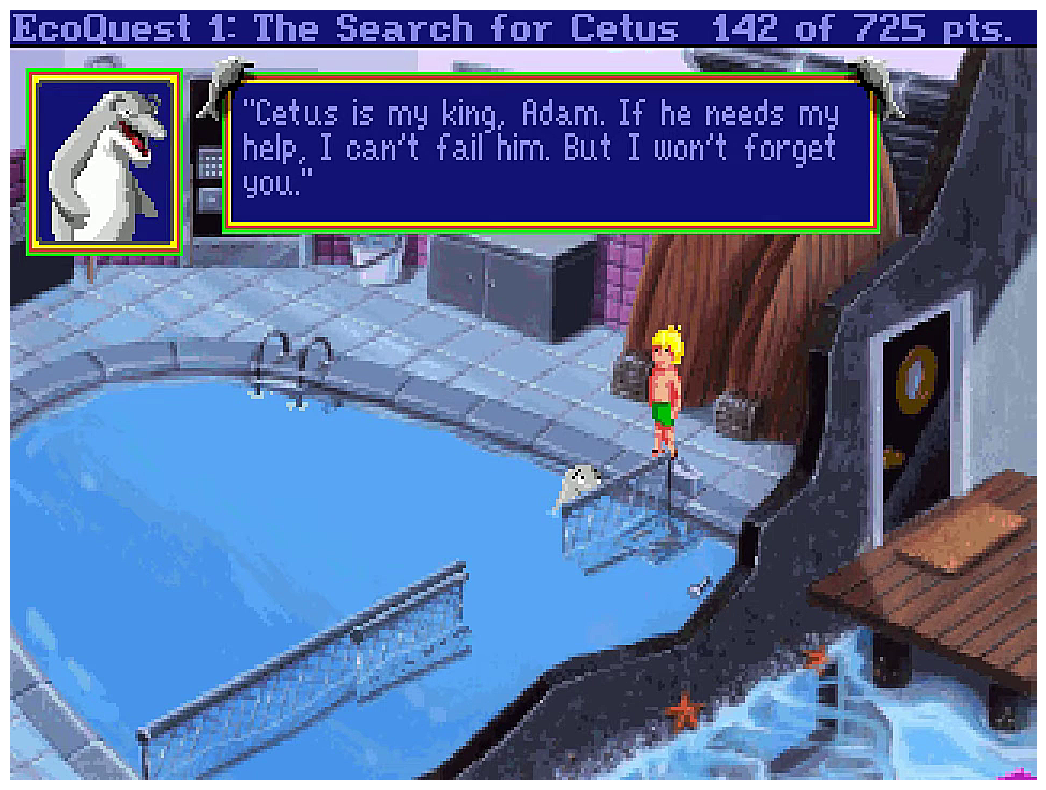

EcoQuest 1: The Search for Cetus i142 an ae pts.

“Cetus is my king, Adam. Tf he needs my ’
=|help, I can’t fail hin. But T won't forget
| you.”




In [10]:
tess(unsharp(src))

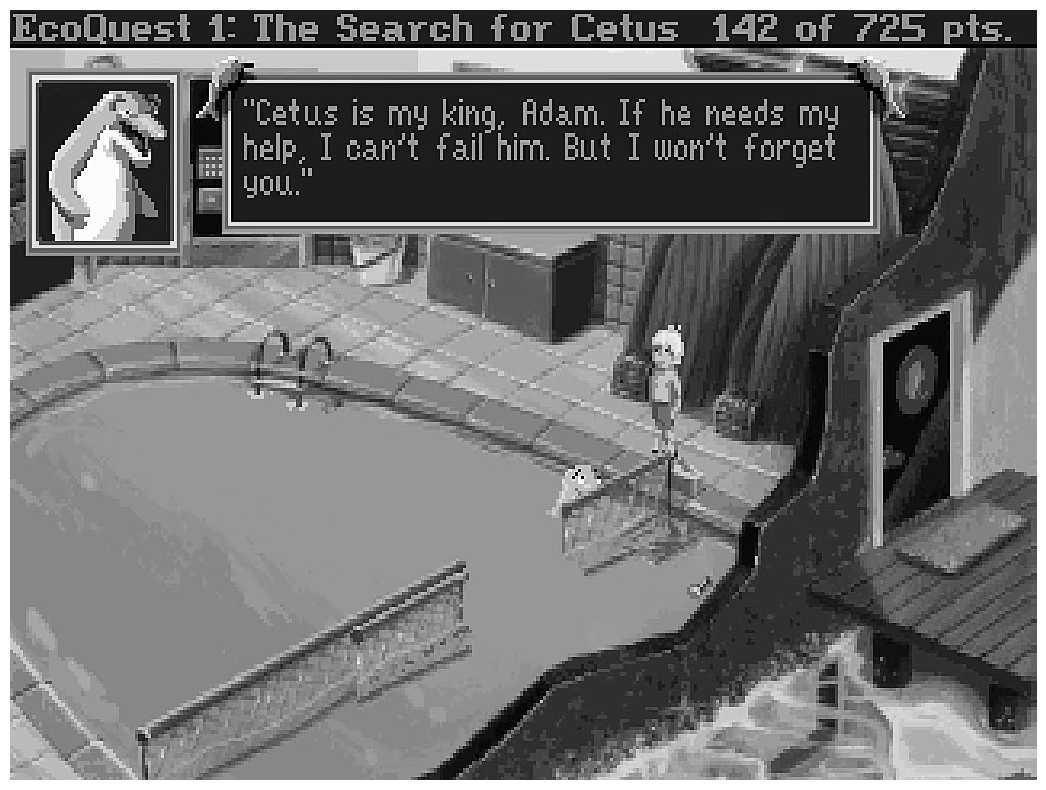

———

=

EcoQuest 1: The Search for Cetus 142 of 725 pts.




In [11]:
tess(gray(unsharp(src)))

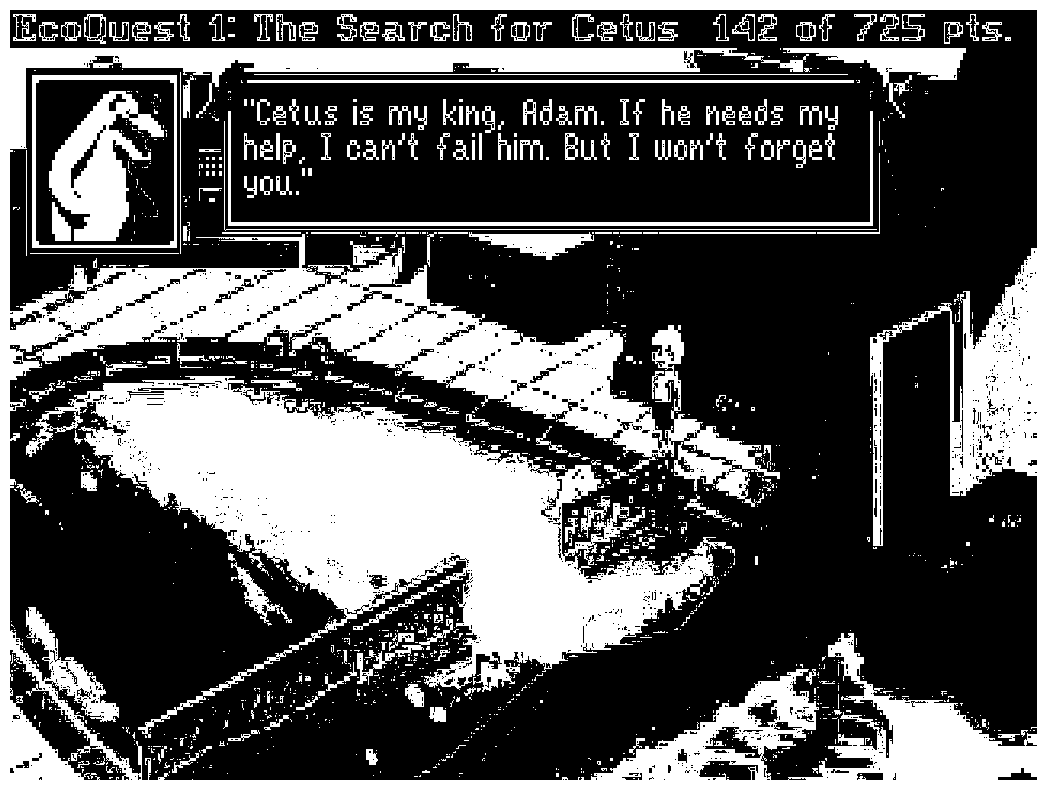

EcoQuest 1: The Search for Cetus te of f2S pis.




In [12]:
tess(thresh(gray(unsharp(src))))

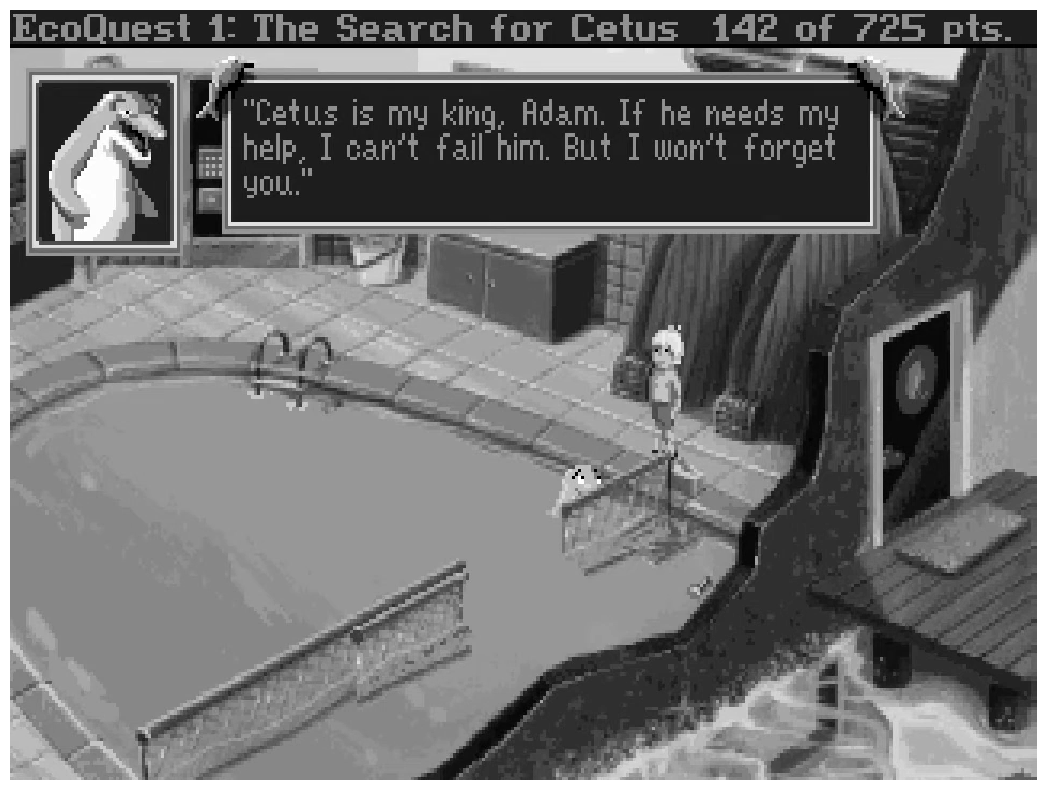

In [13]:
tess(gray(src))

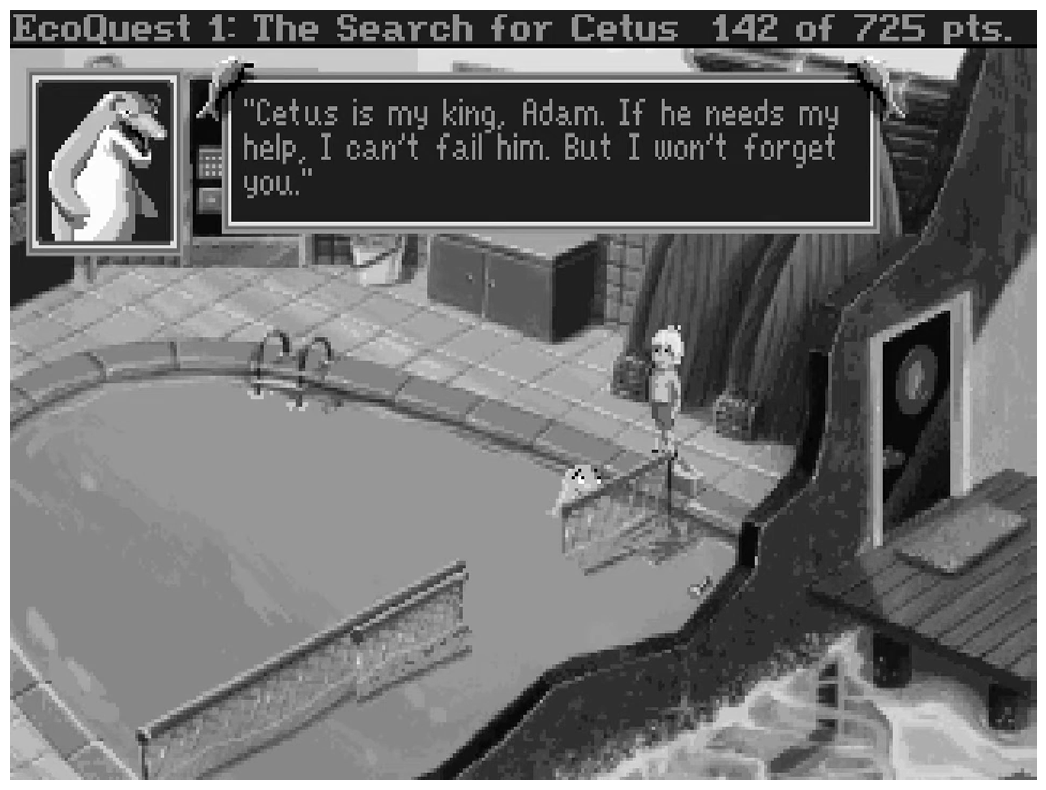

ee 1 The Search for Cetus 142 of fe5 pts.
——— '

iy Cetus i my ie, Adam. If he needs my
Dd help. Tean't fail hin. But T won't forget




In [14]:
tess(scale(2, gray(src)))

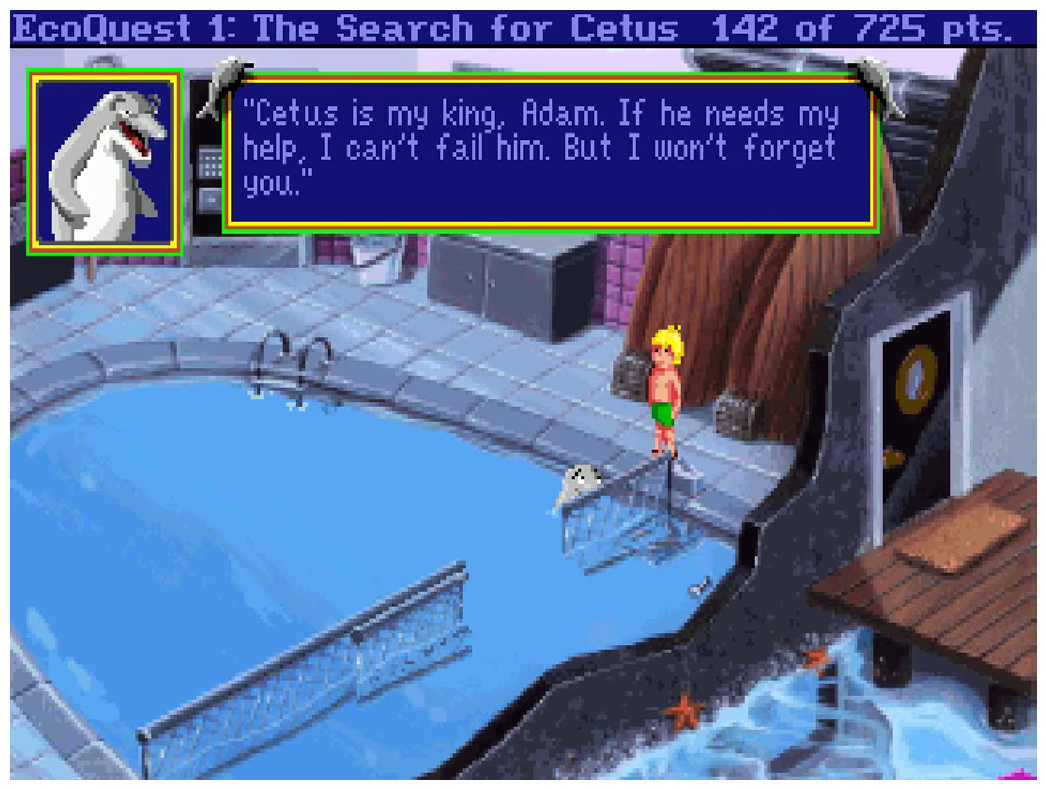

EcoQuest 1: The Search for Cetus 142 of 725 Pts.

yy Cetus is my king, Adam. Te he needs ry
=| help, I can’t fail hin. But Iowon't forget
| You.”




In [15]:
tess(scale(2, src))

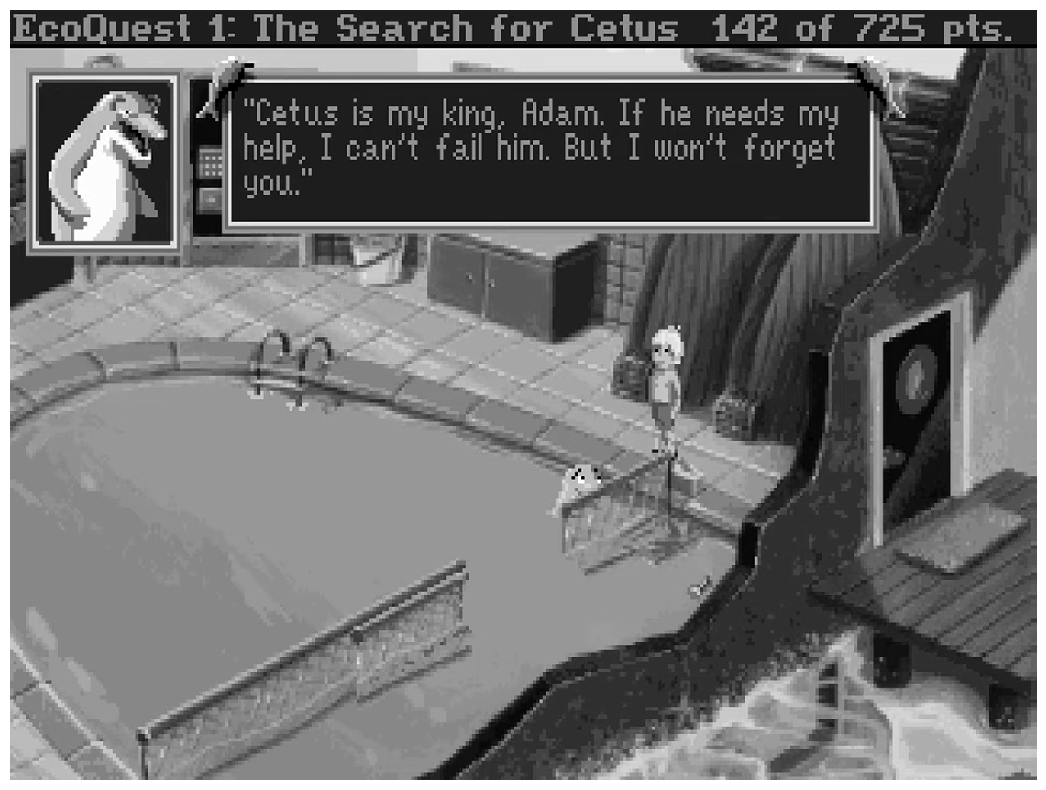

ee 1 The Search for Cetus 142 of ?e5 oe

———

"C =e l= my a, er If he needs my
=] help. i can't fail him. But I won't for get

et you.”




In [16]:
tess(scale(1.5, gray(src)))

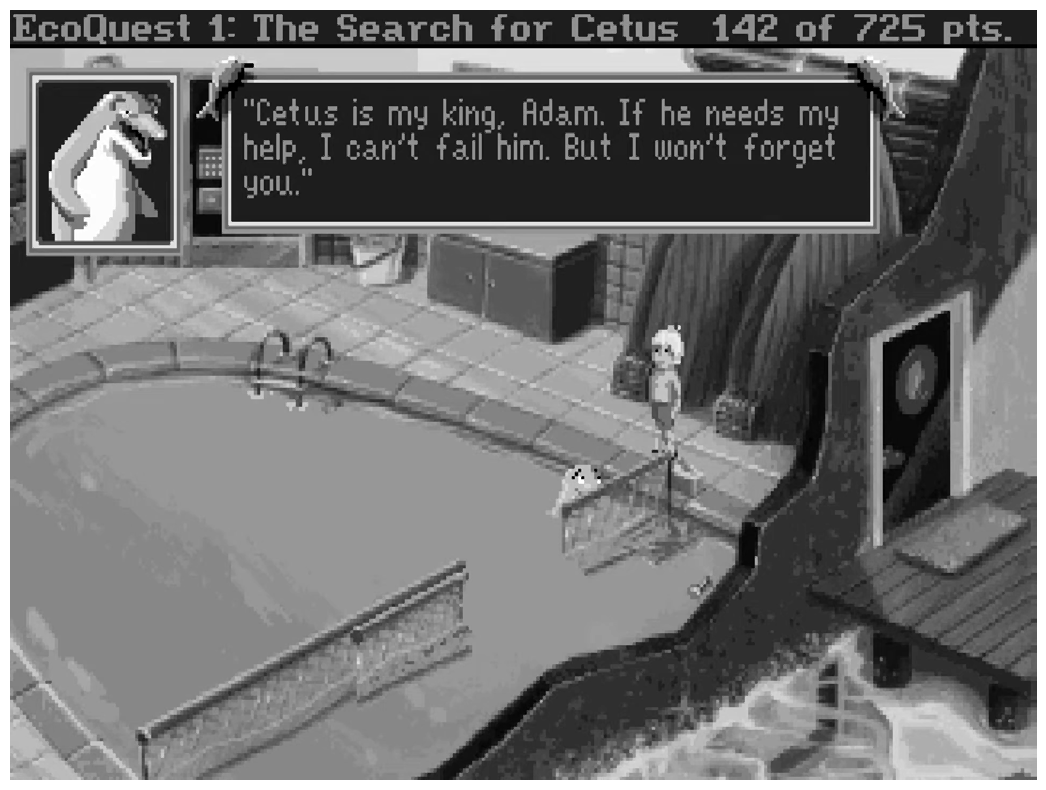

142 of 725 pts.

= _ i

EcoQuest 1: The Search for Cetus

yy Cetus is my king, Adam. Tf he needs ry
eq help, I can’t fail him. But I won't forget

a YOu,




In [17]:
tess(blur(scale(2, gray(src))))

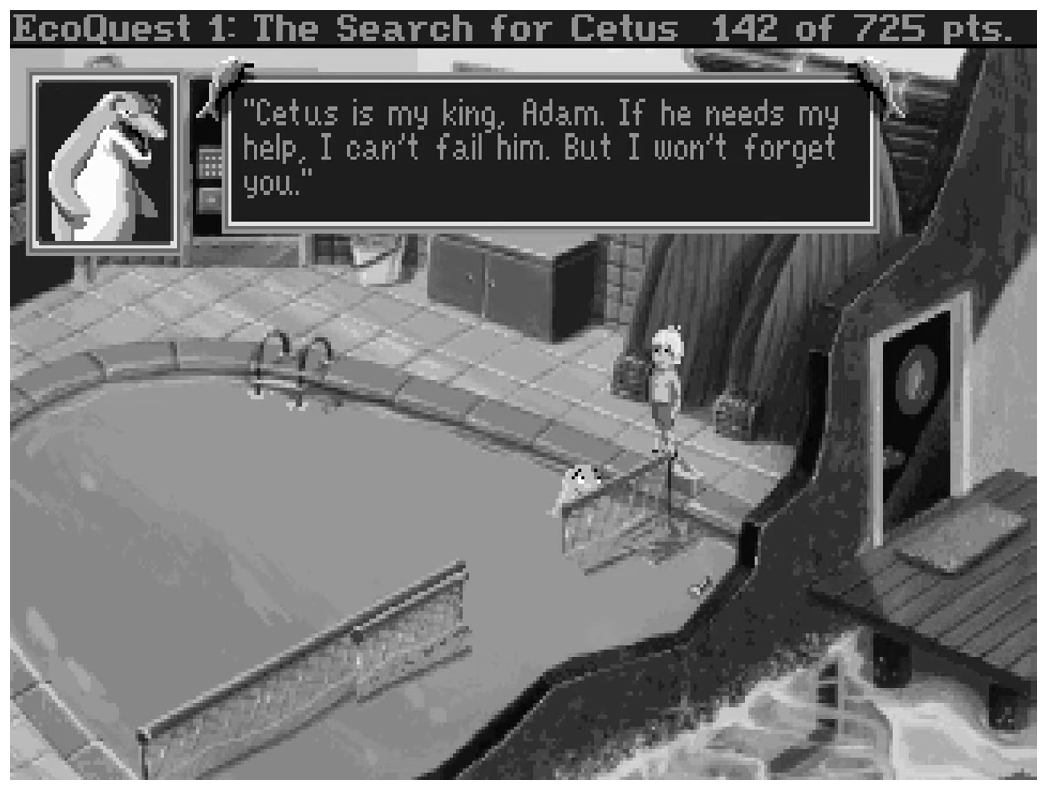

——-— 1 The Search for Cetus 142 of fe oe

| "Cetus ls my king, ieecn If he ree
ef help, I can’t fail hin. But I won't for

“HW WoL.
=|| -




In [18]:
tess(blur(scale(3, gray(src))))

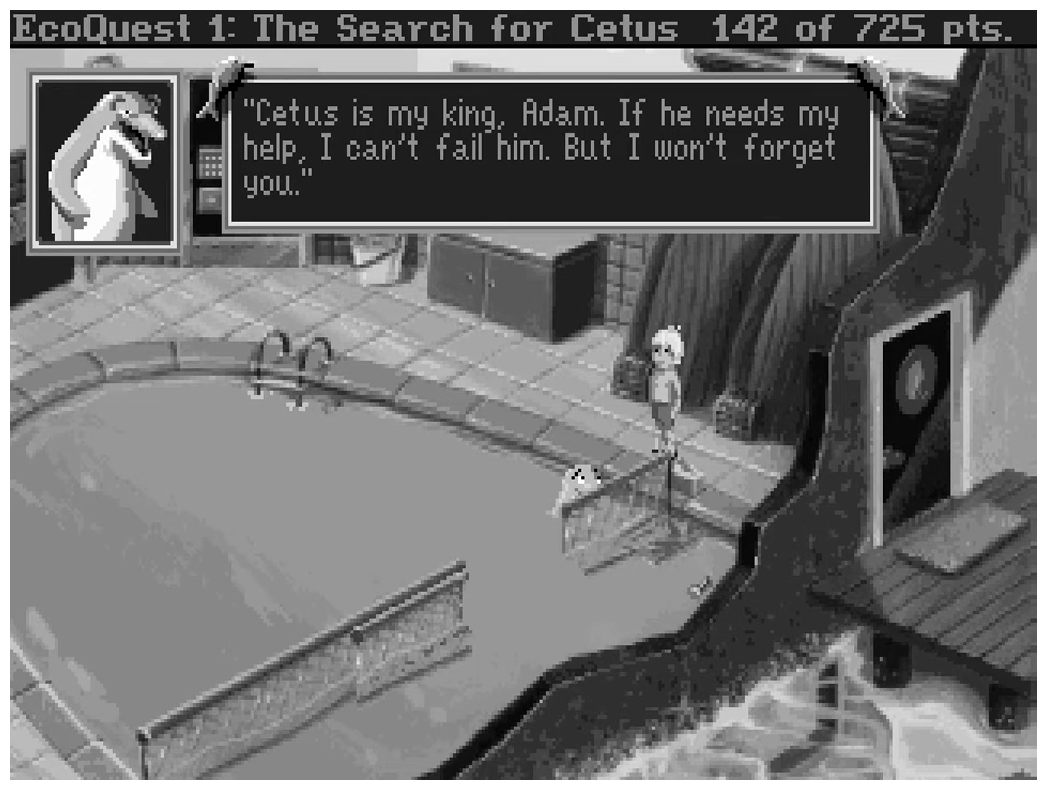

—_——— 1 The Search tor Cetus 142 of fes —
ee

Cetus I= my Kirn, Adan, It he heed:
af help. Toan't fall hirn. But IT wort +

i i

=
4 a — 6ULTlCLT = »
Y =) tat a 5
: Foe =
i
=e »
P|

a. —— a,
“a _ T=
—



In [19]:
tess(blur(scale(6, gray(src))))

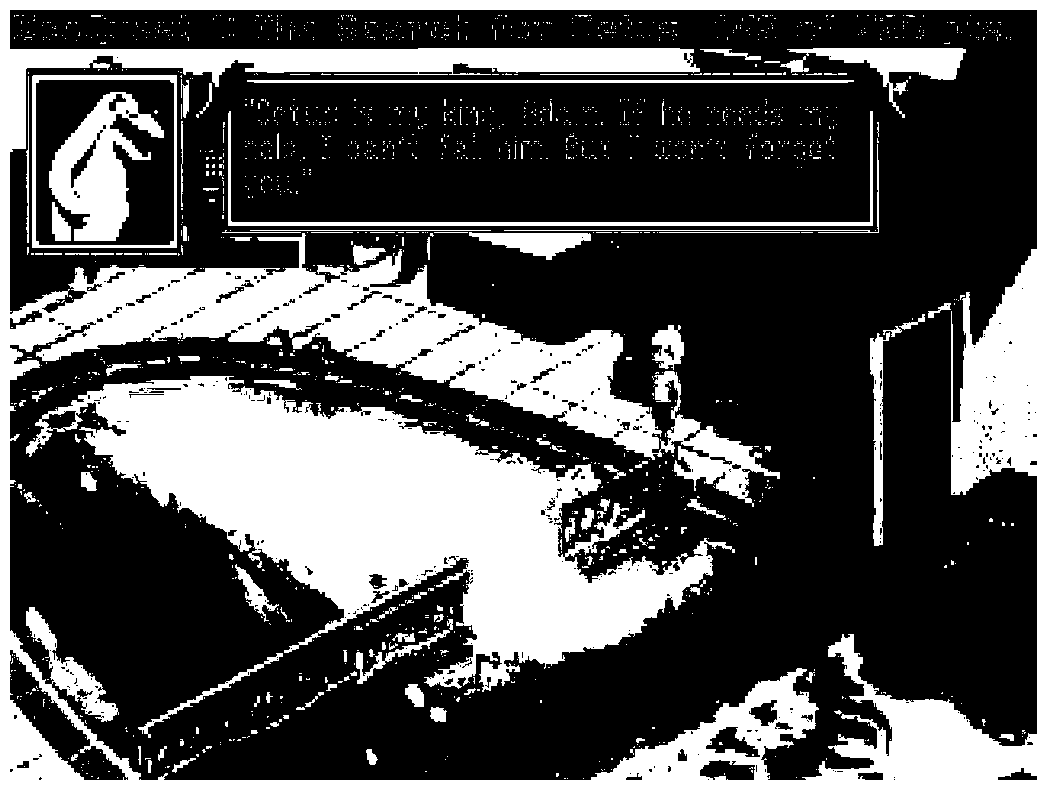

In [20]:
tess(thresh(blur(scale(3, gray(src)))))

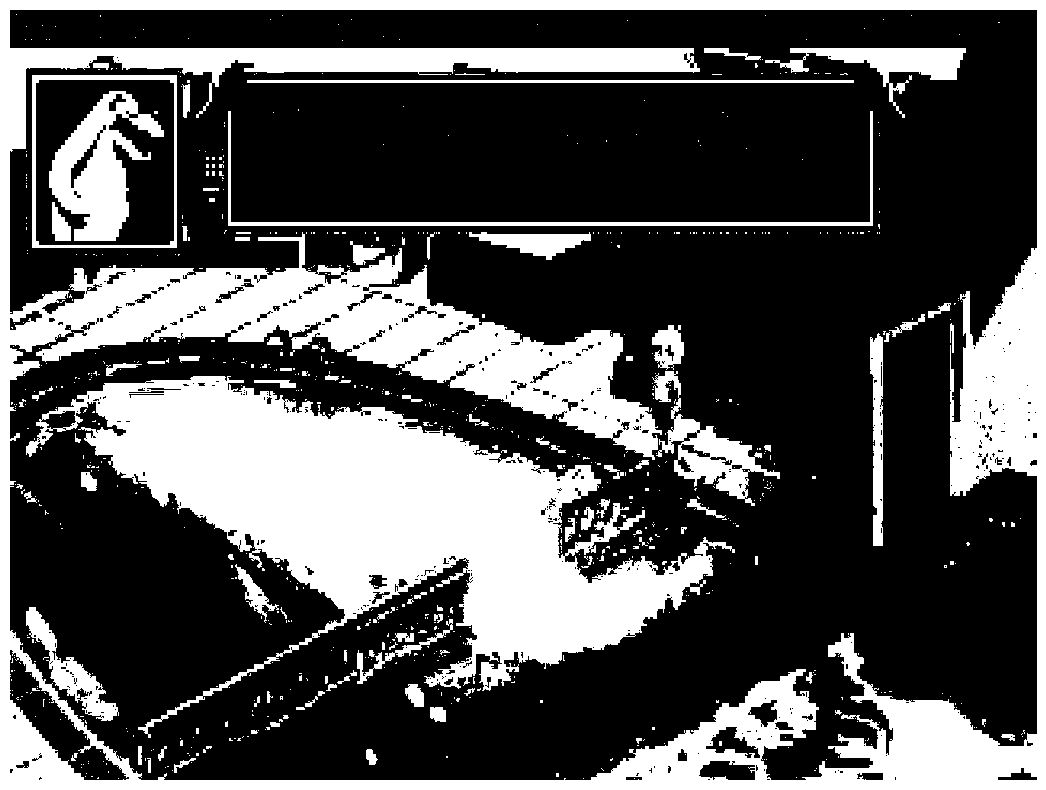

In [21]:
tess(thresh(gray(src)))

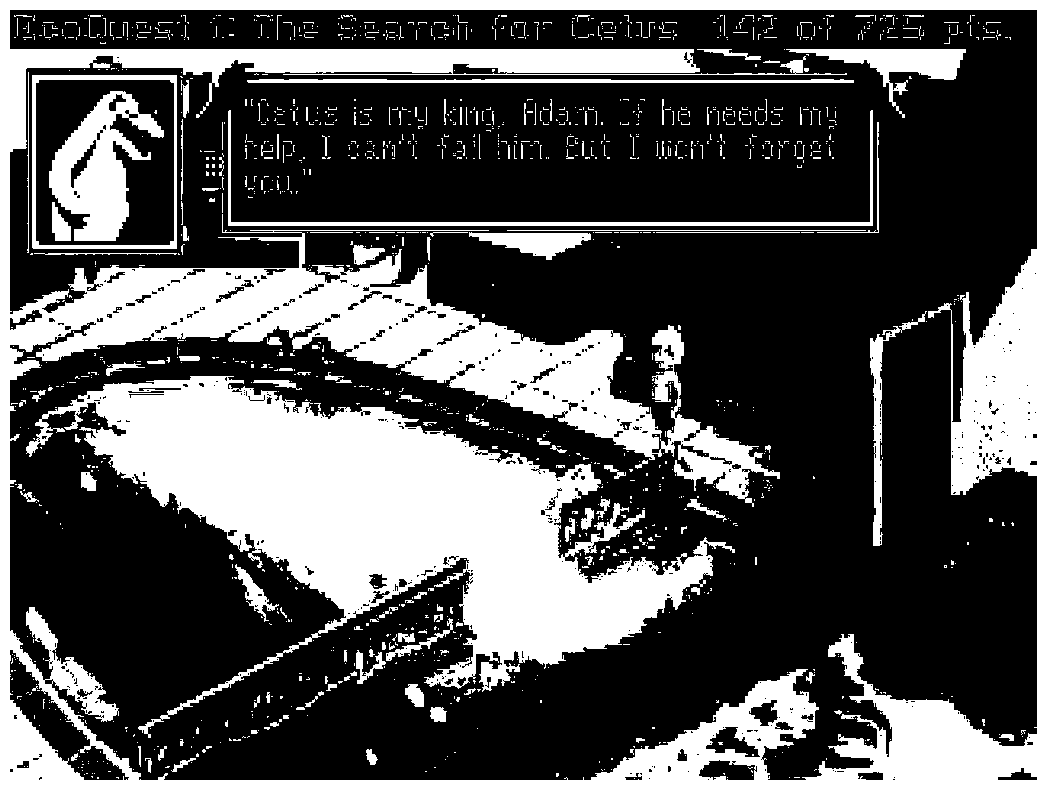

ml im = rc —

+

aie
Ice pee i 72 SEE Pen re nme

Lomi ‘= ia nu i {=




In [22]:
tess(thresh(scale(6, gray(src))))

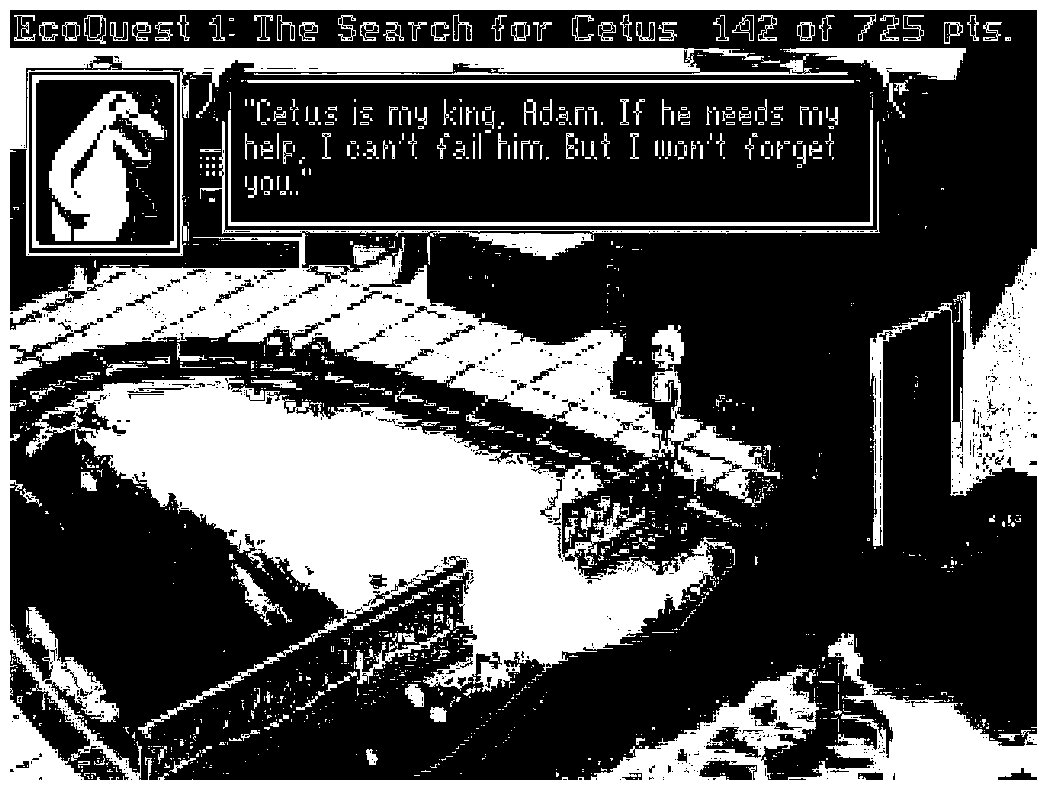

EcolWuest 1 Ihe search tor Letus 142 of #é5 pis.

a i Hing, Hdarn. Tt he needs rr
Fall hirn. But Dowee't for




In [23]:
tess(thresh(scale(3, unsharp(gray(src)))))